In [2]:
import numpy as np
import pandas as pd
import open3d as o3d
import pymeshlab as pyml
import time 
import os
import trimesh


import matplotlib.pyplot as plt
import seaborn as sns


import pclpy
from pclpy import pcl
from plyfile import PlyData, PlyElement,PlyProperty, PlyListProperty
from sklearn.decomposition import PCA



In [3]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_colwidth", 256)

In [4]:
%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})


In [25]:
INPUT_PATH = os.getcwd()+'\\Save data\\Processed_data'
OUTPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'

INPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'
OUTPUT_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output'
OUTPUT_PCA_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output\\PCA'

In [31]:
patient_id_list = '2_BC	3_BC	4_BC	5_BM	6_BM	7_BP	8_BP	9_KBW	10_SUM	11_DHM	12_GAW	13_PMM	14_TR	15_TR	16_TR	18_EM	19_EM	20_EM	21_FA	22_FA	23_HJ	24_HJ	25_HM	26_HM	27_HM	28_JM	29_JM	30_JM	31_JM	32_JM	33_KBB	34_KBB	35_KBB	36_KBB	37_KBB	38_KBB	39_KBB	40_KBB	41_KBB	42_KBB	43_KBB	44_AC	45_AC	46_LE	47_LE	48_LE	49_LE	50_LE	51_LE	52_LE	53_LS	54_MR	55_MR	56_WA	57_SF	58_SI	59_SI'
patient_id_list = patient_id_list.split()
patient_id_list[:5]

['2_BC', '3_BC', '4_BC', '5_BM', '6_BM']

In [ ]:
patient_id_list_new =  '2_BC	3_BC	4_BC	5_BM	6_BM	7_BP	8_BP	9_KBW	10_SUM	11_DHM	12_GAW	13_PMM	14_TR	15_TR	16_TR	18_EM	19_EM	20_EM	21_FA	22_FA	23_HJ	24_HJ	25_HM	26_HM	27_HM	28_JM	29_JM	30_JM	31_JM	32_JM	33_KBB	34_KBB	35_KBB	36_KBB	37_KBB	38_KBB	39_KBB	40_KBB	41_KBB	42_KBB	43_KBB	44_AC	45_AC	46_LE	47_LE	48_LE	50_LE	51_LE	52_LE	54_MR	55_MR	56_WA	57_SF	58_SI	59_SI'
patient_id_list_new = patient_id_list_new.split()
patient_id_list_new[:5]

In [15]:
ORIGINAL_FILENAME = "_PLY0.ply"
WSS_FILENAME = "_WSS.csv"
WSS_DOWN_FILENME = "_WSS_down.csv"
CURV_FILENAME = "_curv_down.csv"

PYMESH_FILENAME = "_pymesh.ply"
DESC_1_FILENAME = "_fpfh.ply"
DESC_2_FILENAME = "_shot.ply"

RADIUS_SEARCH = 0.00024
RADIUS = RADIUS_SEARCH * 0.6

OUTPUT_FILENAME = "_output.ply"
PCA_FILENAME = "_pca.ply"
os.path.join(OUTPUT_TEMP_PATH,f"{ORIGINAL_FILENAME}{PYMESH_FILENAME}")

'D:\\Workspace\\Python\\Thesis Data\\Save data\\Processed_data\\Output_temp\\_PLY0.ply_pymesh.ply'

In [32]:
print (f"TOTAL FILES TO BE PROCESSED: {len(patient_id_list)}")

TOTAL FILES TO BE PROCESSED: 55


## 1. Cleaning and Downsampling
##### Using Meshlab

In [198]:
counter = 1
for PATIENT_ID in patient_id_list:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    ms = pyml.MeshSet()

    TARGET_FACE_COUNT = 30000


    ms.load_new_mesh(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    ms.apply_filter('repair_non_manifold_edges_by_removing_faces')
    ms.apply_filter('simplification_quadric_edge_collapse_decimation',targetfacenum  = TARGET_FACE_COUNT, preserveboundary= True,
                   preservenormal = True, preservetopology = True)

    # ms.save_current_mesh(os.path.join(path,"bm_pymesh.ply"),format = 'ascii' )
    ms.save_current_mesh(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_binary{PYMESH_FILENAME}") )
    
    
    
    #Convert BINARY to ASCII
    plydata = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_binary{PYMESH_FILENAME}"), mmap=False)
    
    #Convert float64 to float32 as PCLPY features dont work on f8
    plydata.elements[0].properties = (PlyProperty('x', 'f4'), PlyProperty('y', 'f4'), PlyProperty('z', 'f4'))

    pl_wr = PlyData(plydata.elements, text = True, comments = ['PLYFILE BINARY TO ASCII CONVERTED'])
    pl_wr.write(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    os.remove(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_binary{PYMESH_FILENAME}"))
    
    print(f"Finished processing {counter} files ")
    counter = counter + 1


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\2_BC_PLY0.ply
Finished processing 1 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\3_BC_PLY0.ply
Finished processing 2 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\4_BC_PLY0.ply
Finished processing 3 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\5_BM_PLY0.ply
Finished processing 4 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\6_BM_PLY0.ply
Finished processing 5 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\7_BP_PLY0.ply
Finished processing 6 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\8_BP_PLY0.ply
Finished processing 7 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\9_KBW_PLY0.ply
Finished processing 8 files 

Processing File at:
D:\Workspa

## 2. Check Nearest Point Dist for different dataset files - For Radius Search

In [8]:
radius_columns = ['original_points','sampled_points','radius_mean','radius_median','radius_std','radius_min','radius_max',]
radius_df = pd.DataFrame(index=patient_id_list, columns = radius_columns )
radius_df.head(2)

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
for PATIENT_ID in patient_id_list:

    #LOAD Point Cloud in o3d instance
    pc_original = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Compute nearest distance
    NN_dist = pc_o3d.compute_nearest_neighbor_distance()
    
    radius_df.loc[PATIENT_ID] = [len(np.asarray(pc_original.points)),len(np.asarray(pc_o3d.points)), 
                          np.mean(NN_dist), np.median(NN_dist), np.std(NN_dist), np.min(NN_dist), np.max(NN_dist)
                         ]

# df = df.astype(float)
radius_df = radius_df.infer_objects()
# pd.to_numeric(df, downcast='float')
radius_df.head(5)

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
2_BC,77127,15307,0.000114,0.000114,0.000026,0.000011,0.000245
3_BC,28274,15271,0.000119,0.000117,0.000026,0.000014,0.000244
4_BC,22604,15223,0.000110,0.000103,0.000019,0.000030,0.000222
5_BM,95358,15366,0.000176,0.000173,0.000057,0.000033,0.000480
6_BM,20744,15154,0.000087,0.000084,0.000017,0.000033,0.000179


In [211]:
radius_df

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
2_BC,77127,15307,0.000114,0.000114,0.000026,0.000011,0.000245
3_BC,28274,15271,0.000119,0.000117,0.000026,0.000014,0.000244
4_BC,22604,15223,0.000110,0.000103,0.000019,0.000030,0.000222
5_BM,95358,15366,0.000176,0.000173,0.000057,0.000033,0.000480
6_BM,20744,15154,0.000087,0.000084,0.000017,0.000033,0.000179
7_BP,68120,15286,0.000077,0.000075,0.000021,0.000022,0.000193
8_BP,88042,15376,0.000088,0.000087,0.000023,0.000020,0.000207
9_KBW,79622,15393,0.000103,0.000102,0.000029,0.000022,0.000244
10_SUM,70856,15155,0.000099,0.000097,0.000026,0.000035,0.000272
11_DHM,76754,15304,0.000102,0.000101,0.000028,0.000035,0.000225


In [212]:
radius_df.describe(percentiles = np.arange(0,1.1,0.1))

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,69993.087719,15298.456140,0.000098,0.000096,0.000026,0.000022,0.000235
std,19124.562555,84.554942,0.000019,0.000018,0.000006,0.000010,0.000050
min,20744.000000,15149.000000,0.000063,0.000061,0.000017,0.000002,0.000148
0%,20744.000000,15149.000000,0.000063,0.000061,0.000017,0.000002,0.000148
10%,40221.400000,15174.600000,0.000077,0.000076,0.000020,0.000009,0.000183
20%,59505.800000,15225.200000,0.000083,0.000082,0.000022,0.000013,0.000194
30%,64185.400000,15265.800000,0.000087,0.000086,0.000023,0.000016,0.000208
40%,71000.800000,15275.800000,0.000092,0.000091,0.000024,0.000018,0.000223
50%,74286.000000,15300.000000,0.000099,0.000097,0.000026,0.000022,0.000235


In [213]:
radius_df.describe().radius_max["50%"]

0.0002354071108829738

In [214]:
radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]

'5_BM'

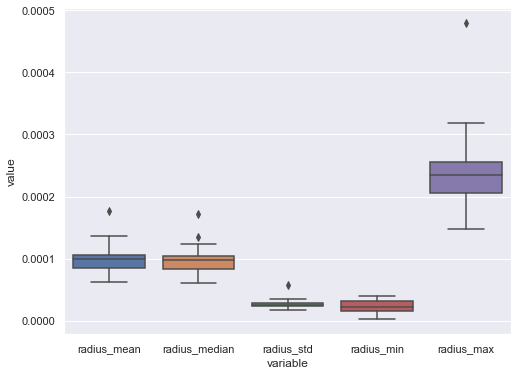

In [215]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,2:]))

plt.show()

## 3. WSS

In [133]:
wss_columns = ['original_points','sampled_points','wss_mean','wss_median','wss_std','wss_min','wss_max',]
wss_eda = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_eda.head(2)

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1 Calculate WSS values across files (original)

In [134]:
for PATIENT_ID in patient_id_list:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    
    wss_eda.loc[PATIENT_ID] = [df_wss.shape[0],np.nan, 
                          np.mean(df_wss.WSS), np.median(df_wss.WSS), np.std(df_wss.WSS), np.min(df_wss.WSS), np.max(df_wss.WSS)
                         ]
wss_eda = wss_eda.infer_objects()
wss_eda.head()


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\2_BC_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\3_BC_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\4_BC_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\5_BM_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\6_BM_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\7_BP_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\8_BP_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\9_KBW_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\10_SUM_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\11_DHM_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_da

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,NaN,2.664416,1.991029,2.601829,0.000063,21.984079
3_BC,28274,NaN,7.343544,7.063340,4.074379,0.073806,31.608334
4_BC,22604,NaN,7.312326,7.512783,2.861085,0.083918,24.377111
5_BM,95358,NaN,9.055627,5.069889,9.886064,0.005298,91.338405
6_BM,20744,NaN,6.449848,4.178266,6.059387,0.007637,36.123463


In [135]:
wss_eda

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,NaN,2.664416,1.991029,2.601829,0.000063,21.984079
3_BC,28274,NaN,7.343544,7.063340,4.074379,0.073806,31.608334
4_BC,22604,NaN,7.312326,7.512783,2.861085,0.083918,24.377111
5_BM,95358,NaN,9.055627,5.069889,9.886064,0.005298,91.338405
6_BM,20744,NaN,6.449848,4.178266,6.059387,0.007637,36.123463
7_BP,68120,NaN,24.352395,22.118984,20.105235,0.010296,153.113420
8_BP,88042,NaN,19.285902,16.796509,15.474012,0.031380,165.442650
9_KBW,79622,NaN,4.818911,4.252105,2.842062,0.031608,19.851186
10_SUM,70856,NaN,6.501759,5.127805,5.408897,0.007576,39.244955
11_DHM,76754,NaN,4.651126,3.326295,4.251434,0.008460,52.571410


In [144]:
wss_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
count,57.000000,0.0,57.000000,57.000000,57.000000,57.000000,57.000000
mean,69993.087719,NaN,15.404597,13.254380,12.644712,0.035336,141.305587
std,19124.562555,NaN,16.532721,15.237611,15.194525,0.041364,275.651552
min,20744.000000,NaN,2.664416,0.544347,1.971920,0.000002,17.415271
50%,74286.000000,NaN,10.643519,9.425014,8.670265,0.019444,79.396483
55.6%,75440.888889,NaN,11.936668,9.858273,9.642366,0.025249,91.680991
61.1%,76219.666667,NaN,13.936746,12.527588,10.984439,0.030018,105.763376
66.7%,77024.333333,NaN,15.668227,12.991728,12.100439,0.031673,125.411953
72.2%,78797.555556,NaN,16.840249,13.637538,13.535132,0.041173,136.615740
77.8%,81400.444444,NaN,19.691919,16.006292,15.503034,0.052133,152.431620


In [139]:
wss_eda.query("wss_max >= 400").index.values

array(['49_LE', '53_LS'], dtype=object)

In [275]:
wss_eda.query("wss_std >= 30").index.values

array(['15_TR', '28_JM', '49_LE', '53_LS'], dtype=object)

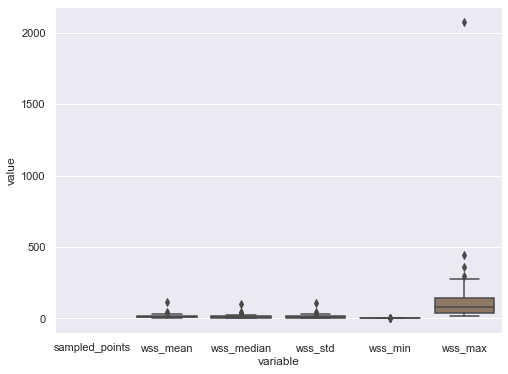

In [123]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.iloc[:,1:]))

plt.show()

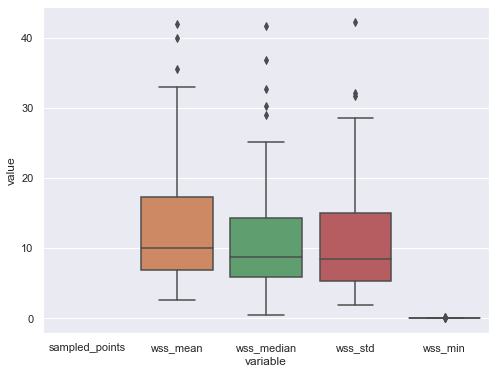

In [271]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.query("wss_std <=100").iloc[:,1:-1]))

plt.show()

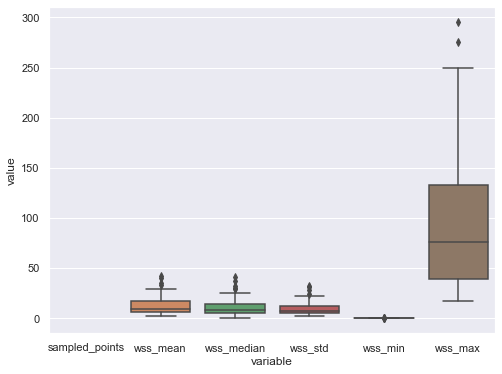

In [274]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.query("wss_max <= 300").iloc[:,1:]))

plt.show()

### 3.2 Calculate WSS for downsampled point cloud

In [207]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
    print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))

In [149]:
# Get the Patient ID for the lowest max dist
P_ID = radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]
print(f"Dataset PATIENT ID = {P_ID}")

Dataset PATIENT ID = 5_BM


In [157]:
#Read original file with WSS
df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{P_ID}{WSS_FILENAME}"))
df_wss.head(10)

,Points:0,Points:1,Points:2,WSS
0,0.013236,-0.001791,-0.030957,27.287485
1,0.013193,-0.001798,-0.031024,27.067192
2,0.013188,-0.001711,-0.031044,25.569170
3,0.013232,-0.001703,-0.030977,25.804458
4,0.017855,-0.005076,-0.031529,11.852991
5,0.017903,-0.005037,-0.031465,11.931856
6,0.017882,-0.005099,-0.031415,11.248607
7,0.017834,-0.005137,-0.031478,11.170350
8,0.016643,-0.006196,-0.030867,8.897130
9,0.016709,-0.006162,-0.030909,8.588890


#### REMOVE PATIENT_IDS WHICH ARE OUTLIERS


In [222]:
#REMOVE PATIENT_IDS WHICH ARE OUTLIERS
patient_id_list_new = [x for x in patient_id_list if x not in wss_eda.query("wss_std >= 40").index.values]

In [231]:
for PATIENT_ID in patient_id_list_new[:15]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
    RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\2_BC_PLY0.ply
Total seconds = 1821
Current file finished in 0 hrs 30 mins 21 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\3_BC_PLY0.ply
Total seconds = 623
Current file finished in 0 hrs 10 mins 23 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\4_BC_PLY0.ply
Total seconds = 368
Current file finished in 0 hrs 6 mins 8 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\5_BM_PLY0.ply
Total seconds = 1711
Current file finished in 0 hrs 28 mins 31 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\6_BM_PLY0.ply
Total seconds = 321
Current file finished in 0 hrs 5 mins 21 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\7_BP_PLY0.ply
Total seconds = 1177
Current file finished in 0 hrs 19 mins 37 secs

Processing File at:
D:\Workspace\Python\Thesi

In [232]:
for PATIENT_ID in patient_id_list_new[17:30]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
    RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\20_EM_PLY0.ply
Total seconds = 607
Current file finished in 0 hrs 10 mins 7 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\21_FA_PLY0.ply
Total seconds = 1689
Current file finished in 0 hrs 28 mins 9 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\22_FA_PLY0.ply
Total seconds = 1501
Current file finished in 0 hrs 25 mins 1 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\23_HJ_PLY0.ply
Total seconds = 2179
Current file finished in 0 hrs 36 mins 19 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\24_HJ_PLY0.ply
Total seconds = 1538
Current file finished in 0 hrs 25 mins 38 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\25_HM_PLY0.ply
Total seconds = 1481
Current file finished in 0 hrs 24 mins 41 secs

Processing File at:
D:\Workspace\Pyth

In [233]:
for PATIENT_ID in patient_id_list_new[30:45]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
    RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\33_KBB_PLY0.ply
Total seconds = 1286
Current file finished in 0 hrs 21 mins 26 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\34_KBB_PLY0.ply
Total seconds = 1995
Current file finished in 0 hrs 33 mins 15 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\35_KBB_PLY0.ply
Total seconds = 1378
Current file finished in 0 hrs 22 mins 58 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\36_KBB_PLY0.ply
Total seconds = 2100
Current file finished in 0 hrs 35 mins 0 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\37_KBB_PLY0.ply
Total seconds = 1708
Current file finished in 0 hrs 28 mins 28 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\38_KBB_PLY0.ply
Total seconds = 1120
Current file finished in 0 hrs 18 mins 40 secs

Processing File at:
D:\Works

In [228]:
df_wss_downsampled.head(10)

,x,y,z,WSS
0,-0.016053,-0.170312,-0.136053,7.763216
1,-0.016126,-0.170261,-0.136058,7.786854
2,-0.016134,-0.170312,-0.135983,7.786854
3,-0.016069,-0.170165,-0.136438,7.756574
4,-0.015988,-0.170190,-0.136440,7.493181
5,-0.016028,-0.170172,-0.136526,7.755634
6,-0.017048,-0.163184,-0.148487,7.762622
7,-0.014137,-0.171077,-0.138721,4.687528
8,-0.014219,-0.171063,-0.138676,4.914766
9,-0.014440,-0.171526,-0.139745,4.824997


In [235]:
for PATIENT_ID in patient_id_list_new[45:]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
    RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\48_LE_PLY0.ply
Total seconds = 827
Current file finished in 0 hrs 13 mins 47 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\50_LE_PLY0.ply
Total seconds = 1694
Current file finished in 0 hrs 28 mins 14 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\51_LE_PLY0.ply
Total seconds = 913
Current file finished in 0 hrs 15 mins 13 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\52_LE_PLY0.ply
Total seconds = 1639
Current file finished in 0 hrs 27 mins 19 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\54_MR_PLY0.ply
Total seconds = 1504
Current file finished in 0 hrs 25 mins 4 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\55_MR_PLY0.ply
Total seconds = 1466
Current file finished in 0 hrs 24 mins 26 secs

Processing File at:
D:\Workspace\Pyt

## 4. Calculate Curvature Values

In [ ]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
    print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))

In [248]:
#Set Radius
RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
    
for PATIENT_ID in patient_id_list_new:
    
    start = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Load Mesh with Trimesh
    #NOTE: The order of the points change compared to the original file
    #In order to concatenate files correctly, original point order needs to be loaded 
    #and the curvature values should be added to that
    tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Load downsampled mesh with original point order
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Make a df with correct order of points - to be used for concatenation of all the features
    curv_df = pd.DataFrame(np.array(pc_down.points), columns = ['x','y','z'] )
    curv_df = np.around(curv_df, decimals = 8)

    #Make df to store the calculated curvature values from trimesh against the vertex
    tri_curv_df = pd.DataFrame(tr_mesh.vertices, columns = ['x','y','z'] )
    
   
    #Compute Curvatures
    mean_curv = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                                  radius =  RADIUS_SEARCH)
    gauss_curv = trimesh.curvature.discrete_gaussian_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                                  radius =  RADIUS_SEARCH)
    
    #Assign curvature values for 
    tri_curv_df["mean_curv"] = mean_curv
    tri_curv_df ["gauss_curv"] = gauss_curv

    #Round it for better merging
    tri_curv_df = np.around(tri_curv_df,decimals = 8)
    
    #Merge the curv values with ordered pointset
    curv_df = curv_df.merge(tri_curv_df, on = ['x','y','z'])
    
    #Save the file with mean and gauss curv vales
    curv_df.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"), index = False )
    
    end = time.time()

    get_total_runtime(start,end) 


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\2_BC_pymesh.ply
Total seconds = 14
Current file finished in 0 hrs 0 mins 14 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\3_BC_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\4_BC_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\5_BM_pymesh.ply
Total seconds = 11
Current file finished in 0 hrs 0 mins 11 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\6_BM_pymesh.ply
Total seconds = 13
Current file finished in 0 hrs 0 mins 13 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\7_BP_pymesh.ply
Total seconds = 15
Current file finishe

Total seconds = 13
Current file finished in 0 hrs 0 mins 13 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\52_LE_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\54_MR_pymesh.ply
Total seconds = 11
Current file finished in 0 hrs 0 mins 11 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\55_MR_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\56_WA_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\57_SF_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_da

## 5. Calculate Local descriptors + Concatenate at the same time

In [12]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
#     print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))
    return hours,minutes,seconds

In [265]:
RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
RADIUS = RADIUS_SEARCH * 0.6

for PATIENT_ID in patient_id_list_new:
    fullstart = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    ############-------------------#############
    ############ Local Descriptors #############
    ############-------------------#############
    
    start = time.time()
    print("--------------> Starting Local descriptor computation")
    
    pcl_pc_obj = pclpy.pcl.PointCloud.PointXYZ()

    #Store in pcl_pc_obj
    pc = pcl.io.loadPLYFile(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"), cloud = pcl_pc_obj )


    data_normals = pcl_pc_obj.compute_normals(radius=RADIUS, num_threads=8)

    fpfh = pcl.features.FPFHEstimation.PointXYZ_Normal_FPFHSignature33()
    fpfh.setInputCloud(cloud = pcl_pc_obj)
    fpfh.setInputNormals(data_normals)
    fpfh.setRadiusSearch(RADIUS_SEARCH)


    fpfh_desc = pcl.PointCloud.FPFHSignature33()
    fpfh.compute(fpfh_desc)

    shot = pcl.features.SHOTEstimation.PointXYZ_Normal_SHOT352_ReferenceFrame()
    shot.setInputCloud(cloud = pcl_pc_obj)
    shot.setInputNormals(data_normals)
    shot.setRadiusSearch(RADIUS_SEARCH)

    shot_desc = pcl.PointCloud.SHOT352()
    shot.compute(shot_desc)

   
    #Save files
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_1_FILENAME}"), cloud = fpfh_desc)
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_2_FILENAME}"), cloud = shot_desc)
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished computing and saving Local descriptors in {hours} hrs {minutes} mins {round(seconds)} secs")

    
    
    ############-------------------#############
    ############ Concatenate Files #############
    ############-------------------#############
    #https://github.com/dranjan/python-plyfile/issues/26 
    
    start = time.time()
    print("--------------> Starting File Concatenation")

    #Load the original downsampled mesh
    meshply = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Load curvature dataframe
    curv_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Load WSS dataframe - downsampled
    wss_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Divide the elements in different variables for concat
    v = meshply.elements[0]
    f = meshply.elements[1]

    # Create the new vertex data with a new name with required dtype
    a = np.empty(len(v.data), v.data.dtype.descr 
                 +[('WSS','f4')]
                 +[('mean_curv','f4')] 
                 + [('gauss_curv','f4')] 
                 + [('fpfh', '|O')] 
                 + [('shot', '|O')] + [('rf', '|O')]
                )

    for name in v.data.dtype.fields:
        #re-assign
        a[name] = v[name]
    # a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
    a['WSS'] = wss_df['WSS'].values
    a['mean_curv'] = curv_df['mean_curv'].values
    a['gauss_curv'] = curv_df['gauss_curv'].values
    
    #Should be list of list for saving using PlyListProperty
    a['fpfh'] = fpfh_desc.histogram.tolist()
    a['shot'] = shot_desc.descriptor.tolist()
    a['rf'] = shot_desc.rf.tolist()

    # Recreate the PlyElement instance
    vert = PlyElement.describe(a, 'vertex')
    
    # Redefine properties - to save correct file format
    vert.properties = v.properties + (PlyProperty('WSS', 'f4'),
                                      PlyProperty('mean_curv', 'f4'),
                                      PlyProperty('gauss_curv', 'f4'),
                                      PlyListProperty('fpfh', 'uint', 'float'),
                                      PlyListProperty('shot', 'uint', 'float'), 
                                      PlyListProperty('rf', 'uint', 'float'),
                                     )
    # Recreate the PlyData instance with added features
    meshply = PlyData([vert, f], text=True)
    
    #Save the Mesh file 
    meshply.write((os.path.join(OUTPUT_PATH,f"{PATIENT_ID}{OUTPUT_FILENAME}")))
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished concatenating files in {hours} hrs {minutes} mins {round(seconds)} secs")
    
    
    fullend = time.time()
    hours,minutes,seconds = get_total_runtime(fullstart,fullend)
    print(f"Total time taken for PATIENT_ID {PATIENT_ID}: {hours} hrs {minutes} mins {round(seconds)} secs")
    print(f"\n {'-'*100}")


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\2_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 9
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 15
Total time taken for PATIENT_ID 2_BC: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\3_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 8 secs
Total seconds = 14
Total time taken for PATIENT_ID 3_BC: 0.0 hrs 0.0 mins 14 secs

--------------

Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 18_EM: 0.0 hrs 0.0 mins 14 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\19_EM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 19_EM: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\20_EM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 5
Finished computing and saving Local descriptors in 

Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 8 secs
Total seconds = 14
Total time taken for PATIENT_ID 34_KBB: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\35_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 5
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 8 secs
Total seconds = 14
Total time taken for PATIENT_ID 35_KBB: 0.0 hrs 0.0 mins 14 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\

Total seconds = 5
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 51_LE: 0.0 hrs 0.0 mins 14 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\52_LE_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 5
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 52_LE: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\54_

In [33]:
# RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
RADIUS_SEARCH = 0.00024
RADIUS = RADIUS_SEARCH * 0.6
FPFH_N_COMPONENTS = 2
SHOT_N_COMPONENTS = 3

for PATIENT_ID in patient_id_list_new:
    fullstart = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    ############-------------------#############
    ############ Local Descriptors #############
    ############-------------------#############
    
    start = time.time()
    print("--------------> Starting Local descriptor computation")
    
    pcl_pc_obj = pclpy.pcl.PointCloud.PointXYZ()

    #Store in pcl_pc_obj
    pc = pcl.io.loadPLYFile(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"), cloud = pcl_pc_obj )


    data_normals = pcl_pc_obj.compute_normals(radius=RADIUS, num_threads=8)

    fpfh = pcl.features.FPFHEstimation.PointXYZ_Normal_FPFHSignature33()
    fpfh.setInputCloud(cloud = pcl_pc_obj)
    fpfh.setInputNormals(data_normals)
    fpfh.setRadiusSearch(RADIUS_SEARCH)


    fpfh_desc = pcl.PointCloud.FPFHSignature33()
    fpfh.compute(fpfh_desc)

    shot = pcl.features.SHOTEstimation.PointXYZ_Normal_SHOT352_ReferenceFrame()
    shot.setInputCloud(cloud = pcl_pc_obj)
    shot.setInputNormals(data_normals)
    shot.setRadiusSearch(RADIUS_SEARCH)

    shot_desc = pcl.PointCloud.SHOT352()
    shot.compute(shot_desc)

   
    #Save files
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_1_FILENAME}"), cloud = fpfh_desc)
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_2_FILENAME}"), cloud = shot_desc)
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished computing and saving Local descriptors in {hours} hrs {minutes} mins {round(seconds)} secs")

    
    
    ############-------------------#############
    ############ Concatenate Files #############
    ############-------------------#############
    #https://github.com/dranjan/python-plyfile/issues/26 
    
    start = time.time()
    print("--------------> Starting File Concatenation")

    #Load the original downsampled mesh
    meshply = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Load curvature dataframe
    curv_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Load WSS dataframe - downsampled
    wss_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Divide the elements in different variables for concat
    v = meshply.elements[0]
    f = meshply.elements[1]
    
    vert, f = get_concatenated_properties(v,f,
                                          wss_df,
                                          curv_df,
                                          fpfh_desc.histogram,
                                          shot_desc.descriptor,
                                          shot_desc.rf)
    
    # Recreate the PlyData instance with added features
    meshply = PlyData([vert, f], text=True)
    
    #Save the Mesh file 
    meshply.write((os.path.join(OUTPUT_PATH,f"{PATIENT_ID}{OUTPUT_FILENAME}")))
    
    
    fpfh_desc_pca, shot_desc_main_pca, shot_desc_rf_pca = compute_PCA_transform(fpfh_desc.histogram,
                                                                                shot_desc.descriptor,
                                                                                shot_desc.rf,
                                                                                FPFH_N_COMPONENTS,
                                                                               SHOT_N_COMPONENTS)
    
    vert, f = get_concatenated_properties(v,f,
                                          wss_df,
                                          curv_df,
                                          fpfh_desc_pca,
                                          shot_desc_main_pca,
                                          shot_desc_rf_pca)
    
     # Recreate the PlyData instance with added features
    meshply = PlyData([vert, f], text=True)
    
    #Save the Mesh file 
    meshply.write((os.path.join(OUTPUT_PCA_PATH,f"{PATIENT_ID}{PCA_FILENAME}")))
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished concatenating files in {hours} hrs {minutes} mins {round(seconds)} secs")
    
    
    fullend = time.time()
    hours,minutes,seconds = get_total_runtime(fullstart,fullend)
    print(f"Total time taken for PATIENT_ID {PATIENT_ID}: {hours} hrs {minutes} mins {round(seconds)} secs")
    print(f"\n {'-'*100}")


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\2_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 10
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 10 secs
--------------> Starting File Concatenation
Total seconds = 17
Finished concatenating files in 0.0 hrs 0.0 mins 18 secs
Total seconds = 27
Total time taken for PATIENT_ID 2_BC: 0.0 hrs 0.0 mins 28 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\3_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 9
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 17
Finished concatenating files in 0.0 hrs 0.0 mins 17 secs
Total seconds = 26
Total time taken for PATIENT_ID 3_BC: 0.0 hrs 0.

Total seconds = 9
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 17
Finished concatenating files in 0.0 hrs 0.0 mins 17 secs
Total seconds = 26
Total time taken for PATIENT_ID 18_EM: 0.0 hrs 0.0 mins 27 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\19_EM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 9
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 18
Finished concatenating files in 0.0 hrs 0.0 mins 18 secs
Total seconds = 27
Total time taken for PATIENT_ID 19_EM: 0.0 hrs 0.0 mins 27 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\

Total seconds = 10
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 10 secs
--------------> Starting File Concatenation
Total seconds = 19
Finished concatenating files in 0.0 hrs 0.0 mins 19 secs
Total seconds = 29
Total time taken for PATIENT_ID 33_KBB: 0.0 hrs 0.0 mins 29 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\34_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 10
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 10 secs
--------------> Starting File Concatenation
Total seconds = 20
Finished concatenating files in 0.0 hrs 0.0 mins 21 secs
Total seconds = 30
Total time taken for PATIENT_ID 34_KBB: 0.0 hrs 0.0 mins 31 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\

Total seconds = 8
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 18
Finished concatenating files in 0.0 hrs 0.0 mins 18 secs
Total seconds = 27
Total time taken for PATIENT_ID 48_LE: 0.0 hrs 0.0 mins 27 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\50_LE_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 9
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 18
Finished concatenating files in 0.0 hrs 0.0 mins 18 secs
Total seconds = 27
Total time taken for PATIENT_ID 50_LE: 0.0 hrs 0.0 mins 27 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\

In [29]:

def compute_PCA_transform(fpfh_desc, shot_desc_main, shot_desc_rf,
                          fpfh_N_COMPONENTS, shot_N_components):
    
    fp    = np.nan_to_num(fpfh_desc)
    sh_main = np.nan_to_num(shot_desc_main)
    sh_rf = np.nan_to_num(shot_desc_rf)
    
    #Instantiate PCA for FPFH
    pca = PCA(n_components= fpfh_N_COMPONENTS)
    pca.fit(fp)
    fpfh = pca.transform(fp)
    
    #Instantiate PCA for SHOT
    pca = PCA(n_components= shot_N_components)
    pca.fit(sh_main)
    shot_main = pca.transform(sh_main)
    
    pca.fit(sh_rf)
    shot_rf = pca.transform(sh_rf)
    
    return fpfh, shot_main, shot_rf

In [20]:
def get_concatenated_properties(vertex, face, wss_df,curv_df,fpfh_desc,shot_desc_main,shot_desc_rf):
    
    # Create the new vertex data with a new name with required dtype
    a = np.empty(len(v.data), v.data.dtype.descr 
                 +[('WSS','f4')]
                 +[('mean_curv','f4')] 
                 + [('gauss_curv','f4')] 
                 + [('fpfh', '|O')] 
                 + [('shot', '|O')] + [('rf', '|O')]
                )

    for name in v.data.dtype.fields:
        #re-assign
        a[name] = v[name]
    # a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
    a['WSS'] = wss_df['WSS'].values
    a['mean_curv'] = curv_df['mean_curv'].values
    a['gauss_curv'] = curv_df['gauss_curv'].values
    
    #Should be list of list for saving using PlyListProperty
    a['fpfh'] = fpfh_desc.tolist()
    a['shot'] = shot_desc_main.tolist()
    a['rf'] = shot_desc_rf.tolist()

    # Recreate the PlyElement instance
    vert = PlyElement.describe(a, 'vertex')
    
    # Redefine properties - to save correct file format
    vert.properties = v.properties + (PlyProperty('WSS', 'f4'),
                                      PlyProperty('mean_curv', 'f4'),
                                      PlyProperty('gauss_curv', 'f4'),
                                      PlyListProperty('fpfh', 'uint', 'float'),
                                      PlyListProperty('shot', 'uint', 'float'), 
                                      PlyListProperty('rf', 'uint', 'float'),
                                     )
    
    return vert, f

In [150]:
#Read Downsampled point cloud
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

#Build tree for original point cloud
o3d_kdtree = o3d.geometry.KDTreeFlann(pc_o3d)

# Radius search 
RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)

search_pt_min = pc_o3d.points[np.argmin(np.array(NN_dist))]
search_pt_max = pc_o3d.points[np.argmax(np.array(NN_dist))]

[k_min, idx_min, _] = o3d_kdtree.search_radius_vector_3d(search_pt_min, RADIUS_SEARCH)
[k_max, idx_max, _] = o3d_kdtree.search_radius_vector_3d(search_pt_max, RADIUS_SEARCH)

print(f"\nTotal neighbourhood points for the point with: \nmin dist = {k_min} \nmax dist = {k_max}")


Total neighbourhood points for the point with: 
min dist = 8 
max dist = 4


In [197]:
np.array(pc_o3d.points)[idx_max]

array([[ 0.02120341, -0.00085545, -0.02338964],
       [ 0.02135746, -0.00092897, -0.02336138],
       [ 0.02107149, -0.00089891, -0.02350854],
       [ 0.02124992, -0.00101906, -0.02346549]])

In [182]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"tet.ply"))
v = p.elements[0]
f = p.elements[1]

# Create the new vertex data with a new name with required dtype
a = np.empty(len(v.data), v.data.dtype.descr + [('label', 'i4')])
for name in v.data.dtype.fields:
    #re-assign
    a[name] = v[name]
a['label'] = 123
a['label'][0] = 123
a['label'][1] = 126
a['label'][2] = 129
a['label'][3] = 121

# Recreate the PlyElement instance
v = PlyElement.describe(a, 'vertex')

# Recreate the PlyData instance
p = PlyData([v, f], text=True)

p.write((os.path.join(OUTPUT_TEMP_PATH,"test.ply")))

In [176]:
v.data.dtype.fields

mappingproxy({'x': (dtype('float32'), 0),
              'y': (dtype('float32'), 4),
              'z': (dtype('float32'), 8),
              'label': (dtype('int32'), 12)})

In [194]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"tet.ply"))
v = p.elements[0]
f = p.elements[1]

# Create the new vertex data with a new name with required dtype
a = np.empty(len(v.data), v.data.dtype.descr + [('label', '|O')])
for name in v.data.dtype.fields:
    #re-assign
    a[name] = v[name]
a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
# a['label'][0] = 123
# a['label'][1] = 126
# a['label'][2] = 129
# a['label'][3] = 121

# Recreate the PlyElement instance
v = PlyElement.describe(a, 'vertex')

# Recreate the PlyData instance
p = PlyData([v, f], text=True)

p.write((os.path.join(OUTPUT_TEMP_PATH,"test.ply")))

In [192]:
np.array([1,2,19])

array([ 1,  2, 19])

In [181]:
a

array([(0., 0., 0., 123), (0., 1., 1., 126), (1., 0., 1., 129),
       (1., 1., 0., 121)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('label', '<i4')])

In [168]:
v.data.dtype.descr + [('label', 'i4')]

[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('label', 'i4')]

In [188]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"test_fpfh.ply"))
v = p.elements[0]

In [189]:
p.elements[0].data.dtype.descr

[('fpfh', '|O')]

In [183]:
a['label']

array([123, 126, 129, 121])

In [190]:
p.elements[0].data

array([(array([84.14448  ,  0.       ,  0.       ,  0.       ,  2.3670673,
       13.488455 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       , 84.14448  ,  0.       ,  0.       ,  2.3670673,
        8.992304 ,  0.       ,  0.       ,  2.1290843,  2.3670673,
        0.       ,  0.       , 68.52694  ,  0.       ,  0.       ,
        0.       ,  2.3670673, 13.488455 ,  8.516337 ,  7.1012025,
        0.       ,  0.       ,  0.       ], dtype=float32),),
       (array([100.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       , 100.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,  86.40641  ,   0.       ,   0.       ,
         0.       ,   3.3983986,   6.7967973,   3.3983986,   0.       ,
         0.       ,   0.       ,   0.       ], dtype=float32),),
       (array([100.,   